In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

X = pd.DataFrame(X,columns = iris_data.feature_names)
y = pd.Series(y)
y = pd.get_dummies(y)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [3]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [6]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivation(x):
    return x*(1-x)

input_size = X.shape[1]
hidden_size = 5
output_size = y_train.shape[1]

v = np.random.randn(input_size,hidden_size)
w = np.random.randn(hidden_size, output_size)

lr = 0.001
epochs = 30

losses = []
accuracy = []

for i in range(epochs):
    z_in = np.dot(X_train,v)
    z = sigmoid(z_in)
    y_in = np.dot(z,w)
    y_hat = sigmoid(y_in)

    y_hat_pred = np.argmax(y_hat,axis=1)
    y_hat_true = np.argmax(y_train,axis=1)

    loss = np.mean((y_hat - y_train)**2)
    acc = np.mean(y_hat_pred == y_hat_true)
    losses.append(loss)
    accuracy.append(acc)

    dy = (y_train-y_hat) * sigmoid_derivation(y_hat)
    dw = np.dot(z.T,dy)
    dz = np.dot(dy,dw.T) * sigmoid(z)
    dv = np.dot(X_train.T, dz)

    v -= lr*dv
    w -= lr*dw

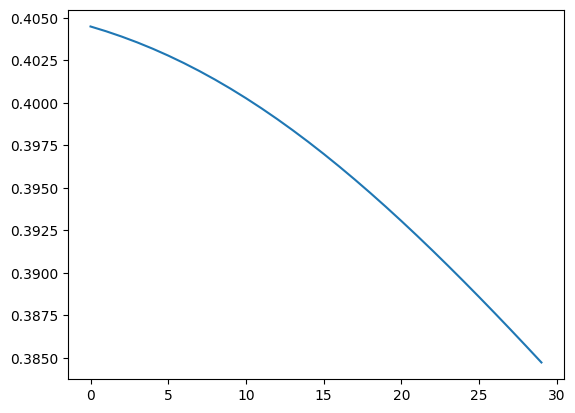

In [7]:
plt.plot(np.array(losses))